# Warburg Analysis


Analyzing the impact of pWarburgSwitch and minimumOxygenConcentration on tumour growth.

Looking at metrics experiments run with pWarburgSwitch 5%, 13%, 20%, 40%, 80% (5 probabilities)

For minimumOxygenConcentration of: 12, 15, 18 (3 thresholds)


In [2]:
import pandas as pd
from IPython.core.display import HTML
import json

with open("../config.json", "r") as f:
    config = json.load(f)
    f.close()

data = pd.read_csv("../{0}/{1}".format(config["analysis_dir"], config["mean_error_csv"]))
data["ame"] = pd.to_numeric(data["ame"])
data_grouped = data.groupby(["minimumOxygenConcentration", "pWarburgSwitch"])
mean_errors = pd.DataFrame(data_grouped.mean()["ame"])
print(display(HTML(mean_errors.to_html())))
counts = pd.DataFrame(data_grouped.count().rename(columns={"ame":"count"})["count"])
print(display(HTML(counts.to_html())))


,,ame
minimumOxygenConcentration,pWarburgSwitch,
12,0.05,57.155294


None


,,count
minimumOxygenConcentration,pWarburgSwitch,
12,0.05,5


None


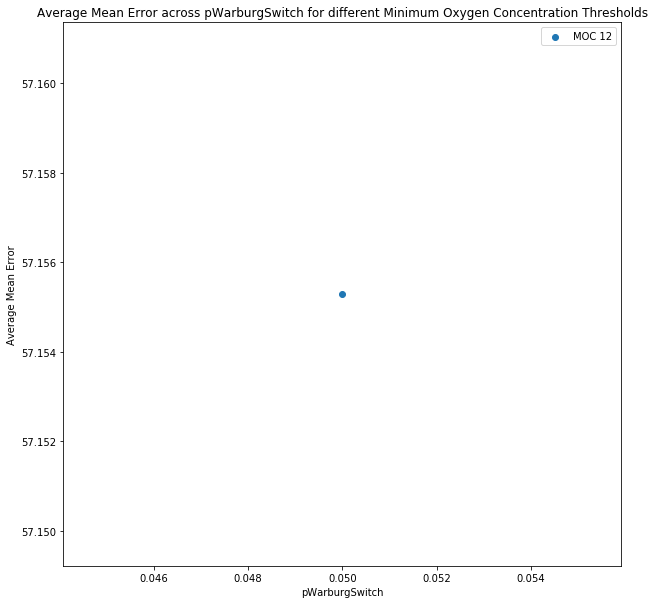

In [4]:
mocs = mean_errors.index.levels[0]
pwss = mean_errors.index.levels[1]

from pandas.core.common import flatten
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
plt.title("Average Mean Error across pWarburgSwitch for different Minimum Oxygen Concentration Thresholds")
plt.xlabel("pWarburgSwitch")
plt.ylabel("Average Mean Error")

legend_template = "MOC %s"

for moc in mocs:
    mocData = mean_errors.loc[[moc]]
    mes = list(flatten(mocData.values))

    plt.scatter(pwss, mes, label=legend_template % str(moc))
    
plt.legend()
plt.show()
    

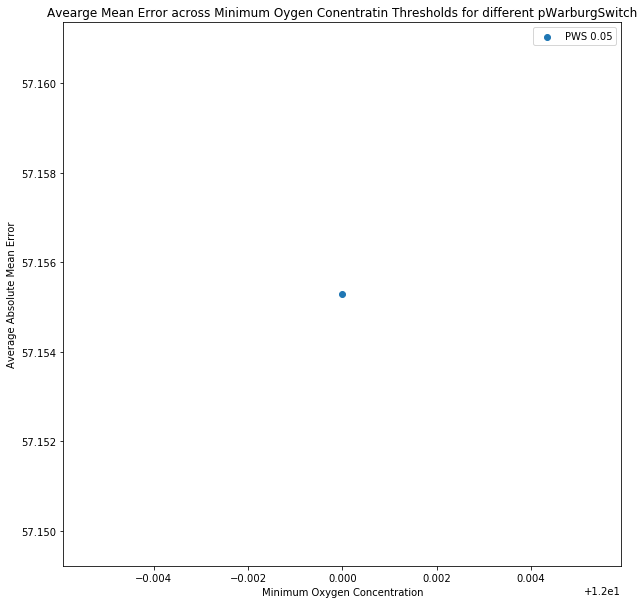

In [5]:
plt.figure(figsize=(10,10))

plt.title("Avearge Mean Error across Minimum Oygen Conentratin Thresholds for different pWarburgSwitch")
plt.xlabel("Minimum Oxygen Concentration")
plt.ylabel("Average Absolute Mean Error")

legend_template = "PWS %s"

markers = ['o', '<', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
for c,pws in enumerate(pwss):
    pwsMEs = list(flatten([mean_errors.loc[[(i, pws)]].values for i in mocs]))
    plt.scatter(mocs, pwsMEs, label=legend_template % str(pws), marker=markers[c])
    plt.plot(mocs, pwsMEs)
    
plt.legend()
plt.show()

## Direction of Error

In [6]:
errorSeries = pd.read_csv("../{0}/{1}".format(config["analysis_dir"], config["error_series_csv"])) 

columns = errorSeries.columns.values
epoch_indexes = [i for i, v in enumerate(columns) if "epoch" in v]

for i in epoch_indexes:
    errorSeries.iloc[:,i] = pd.to_numeric(errorSeries.iloc[:,i])
    
errorSeriesGrouped = errorSeries.groupby(["minimumOxygenConcentration", "pWarburgSwitch"])
mean_errors = pd.DataFrame(errorSeriesGrouped.mean())
display(HTML(mean_errors.to_html()))

errorSeriesCount = errorSeriesGrouped.count()[["name"]]
display(HTML(errorSeriesCount.to_html()))

,,maxAgentDensity,oxygenDiffusivity,vegfDiffusivity,G1,S,G2,M,endothelialDivisionDelay,minimumVegfConcentration,baseOxygenEmissionRate,minHIF,maxHIF,ultraHypoxicThreshold,hypoxicThreshold,minPSynthesis,baseHifRate,numCancerCells,numEndothelialCells,glucoseDiffusivity,glucoseSecretionRate,minGlucoseUptakeRate,maxGlucoseUptakeRate,enhancedHypoxicThreshold,minGlucoseWarburg,baseOxygenMetabolicRate,minGlucoseNonWarburg,healthyTissueOxygenUptakeRate,dt,diffusionSolveIterations,envSize,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,epoch_10,epoch_11,epoch_12,epoch_13,epoch_14,epoch_15,epoch_16,epoch_17,epoch_18,epoch_19,epoch_20,epoch_21,epoch_22,epoch_23,epoch_24,epoch_25,epoch_26,epoch_27,epoch_28,epoch_29,epoch_30,epoch_31,epoch_32,epoch_33,epoch_34,epoch_35,epoch_36,epoch_37,epoch_38,epoch_39,epoch_40,epoch_41,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50,epoch_51,epoch_52,epoch_53,epoch_54,epoch_55,epoch_56,epoch_57,epoch_58,epoch_59,epoch_60,epoch_61,epoch_62,epoch_63,epoch_64,epoch_65,epoch_66,epoch_67,epoch_68,epoch_69,epoch_70,epoch_71,epoch_72,epoch_73,epoch_74,epoch_75,epoch_76,epoch_77,epoch_78,epoch_79,epoch_80,epoch_81,epoch_82,epoch_83,epoch_84,epoch_85,epoch_86,epoch_87,epoch_88,epoch_89,epoch_90,epoch_91,epoch_92,epoch_93,epoch_94,epoch_95,epoch_96,epoch_97,epoch_98,epoch_99,epoch_100,epoch_101,epoch_102,epoch_103,epoch_104,epoch_105,epoch_106,epoch_107,epoch_108,epoch_109,epoch_110,epoch_111,epoch_112,epoch_113,epoch_114,epoch_115,epoch_116,epoch_117,epoch_118,epoch_119,epoch_120,epoch_121,epoch_122,epoch_123,epoch_124,epoch_125,epoch_126,epoch_127,epoch_128,epoch_129,epoch_130,epoch_131,epoch_132,epoch_133,epoch_134,epoch_135,epoch_136,epoch_137,epoch_138,epoch_139,epoch_140,epoch_141,epoch_142,epoch_143,epoch_144,epoch_145,epoch_146,epoch_147,epoch_148,epoch_149,epoch_150,epoch_151,epoch_152,epoch_153,epoch_154,epoch_155,epoch_156,epoch_157,epoch_158,epoch_159,epoch_160,epoch_161,epoch_162,epoch_163,epoch_164,epoch_165,epoch_166,epoch_167,epoch_168,epoch_169,epoch_170,epoch_171,epoch_172,epoch_173,epoch_174,epoch_175,epoch_176,epoch_177,epoch_178,epoch_179,epoch_180,epoch_181,epoch_182,epoch_183,epoch_184,epoch_185,epoch_186,epoch_187,epoch_188,epoch_189,epoch_190,epoch_191,epoch_192,epoch_193,epoch_194,epoch_195,epoch_196,epoch_197,epoch_198,epoch_199,epoch_200,epoch_201,epoch_202,epoch_203,epoch_204,epoch_205,epoch_206,epoch_207,epoch_208,epoch_209,epoch_210,epoch_211,epoch_212,epoch_213,epoch_214,epoch_215,epoch_216,epoch_217,epoch_218,epoch_219,epoch_220,epoch_221,epoch_222,epoch_223,epoch_224,epoch_225,epoch_226,epoch_227,epoch_228,epoch_229,epoch_230,epoch_231,epoch_232,epoch_233,epoch_234,epoch_235,epoch_236,epoch_237,epoch_238,epoch_239,epoch_240,epoch_241,epoch_242,epoch_243,epoch_244,epoch_245,epoch_246,epoch_247,epoch_248,epoch_249,epoch_250,epoch_251,epoch_252,epoch_253,epoch_254,epoch_255,epoch_256,epoch_257,epoch_258,epoch_259,epoch_260,epoch_261,epoch_262,epoch_263,epoch_264,epoch_265,epoch_266,epoch_267,epoch_268,epoch_269,epoch_270,epoch_271,epoch_272,epoch_273,epoch_274,epoch_275,epoch_276,epoch_277,epoch_278,epoch_279,epoch_280,epoch_281,epoch_282,epoch_283,epoch_284,epoch_285,epoch_286,epoch_287,epoch_288,epoch_289,epoch_290,epoch_291,epoch_292,epoch_293,epoch_294,epoch_295,epoch_296,epoch_297,epoch_298,epoch_299
minimumOxygenConcentration,pWarburgSwitch,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,0.05,70,0.364896,0.0001,7,2,10,1,10,4.607216,40,0,16,3,20,0.426172,1,14,1,0.00097,190,10,18.816431,75,17.171682,25,5.340512,25,4500,10,20,-0.5376,-0.455782,-0.493953,-0.406191,-0.331951,-0.226728,-0.130225,-0.030924,0.084133,0.189378,0.297419,0.42231

,,name
minimumOxygenConcentration,pWarburgSwitch,
12,0.05,5


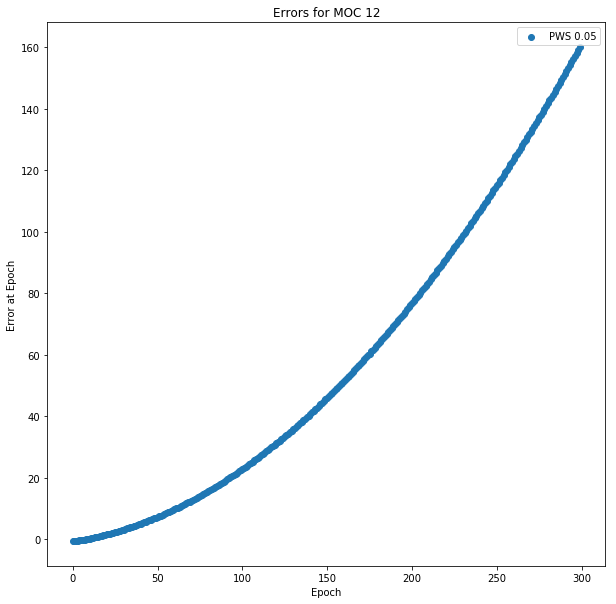

In [7]:

for moc in mocs:
    plt.figure(figsize=(10,10))
    for pws in pwss:
        row = mean_errors.loc[[(moc,pws)]]
        epoch_indexes_for_row = [i for i, v in enumerate(row.columns.values) if "epoch" in v]
        row = row.iloc[:, epoch_indexes_for_row]
        plt.scatter(range(len(epoch_indexes_for_row)), row, label="PWS %s" % str(pws))
    plt.xlabel("Epoch")
    plt.ylabel("Error at Epoch")
    plt.title("Errors for MOC %s" % str(moc))
    plt.legend()
    plt.show()
        